In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)

In [53]:
TRAIN_DIR = '../input/gdsc-nu-datathon-jusan-bank-case-competition/train_data.csv'
TEST_DIR = '../input/gdsc-nu-datathon-jusan-bank-case-competition/test_data.csv'

df_train = pd.read_csv(TRAIN_DIR)
df_test = pd.read_csv(TEST_DIR)

In [54]:
df_train 

,client_id,cato_code,gender,country,citizenship,age_days,client_days,opsos_code,phone_digits,max_dup,...,salary_10,transfers_amount_in_8,transfers_count_in_8,transfers_amount_out_8,transfers_count_out_8,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,2152686,17.0,1.0,0.0,0.0,11643.0,130.0,9.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1712777,2.0,NaN,0.0,0.0,18095.0,994.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,458915,NaN,0.0,0.0,0.0,7955.0,1144.0,7.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.037251,0.033580,0.03358,NaN,0
3,530220,NaN,0.0,0.0,0.0,22580.0,847.0,0.0,6.0,1.0,...,0.036560,NaN,NaN,NaN,NaN,0.115086,0.033581,0.03358,0.092161,0
4,1103654,12.0,0.0,0.0,0.0,13107.0,547.0,12.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941526,1244050,6.0,1.0,0.0,0.0,11813.0,462.0,8.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941527,1142266,12.0,0.0,0.0,0.0,11573.0,787.0,8.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941528,1327217,9.0,1.0,0.0,0.0,11268.0,455.0,11.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03358,NaN,0
941529,1634056,5.0,1.0,0.0,NaN,17215.0,400.0,10.0,4.0,1.0,...,0.038471,NaN,NaN,NaN,NaN,0.041267,0.033580,0.03358,0.037430,0


Converting the datetime dtype columns to int values in order to use the dates as features to the model.

In [55]:
df_train['date_close'] = pd.to_datetime(df_train['date_close']).apply(lambda x: x.value)
df_train['deal_start_date_express'] = pd.to_datetime(df_train['deal_start_date_express']).apply(lambda x: x.value)
df_train['plan_end_date_express'] = pd.to_datetime(df_train['plan_end_date_express']).apply(lambda x: x.value)
df_train['deal_start_date_product'] = pd.to_datetime(df_train['deal_start_date_product']).apply(lambda x: x.value)
df_train['plan_end_date_product'] = pd.to_datetime(df_train['plan_end_date_product']).apply(lambda x: x.value)

In [56]:
df_train['date_close']

0        -9223372036854775808
1        -9223372036854775808
2         1664582400000000000
3        -9223372036854775808
4        -9223372036854775808
                 ...         
941526   -9223372036854775808
941527   -9223372036854775808
941528   -9223372036854775808
941529   -9223372036854775808
941530   -9223372036854775808
Name: date_close, Length: 941531, dtype: int64

In [57]:
# Checking datatypes of the dataset
df_train.dtypes

client_id                    int64
cato_code                  float64
gender                     float64
country                    float64
citizenship                float64
age_days                   float64
client_days                float64
opsos_code                 float64
phone_digits               float64
max_dup                    float64
monthly_installment        float64
date_close                   int64
deposit_sum_KZT            float64
deposit_sum_USD            float64
deposit_sum_EUR            float64
deal_sum_kzt_express       float64
expired_day_express        float64
deal_start_date_express      int64
plan_end_date_express        int64
deal_sum_kzt_product       float64
expired_day_product        float64
deal_start_date_product      int64
plan_end_date_product        int64
transfers_amount_in_9      float64
transfers_count_in_9       float64
transfers_amount_out_9     float64
transfers_count_out_9      float64
transactions_amount_9      float64
transactions_count_9

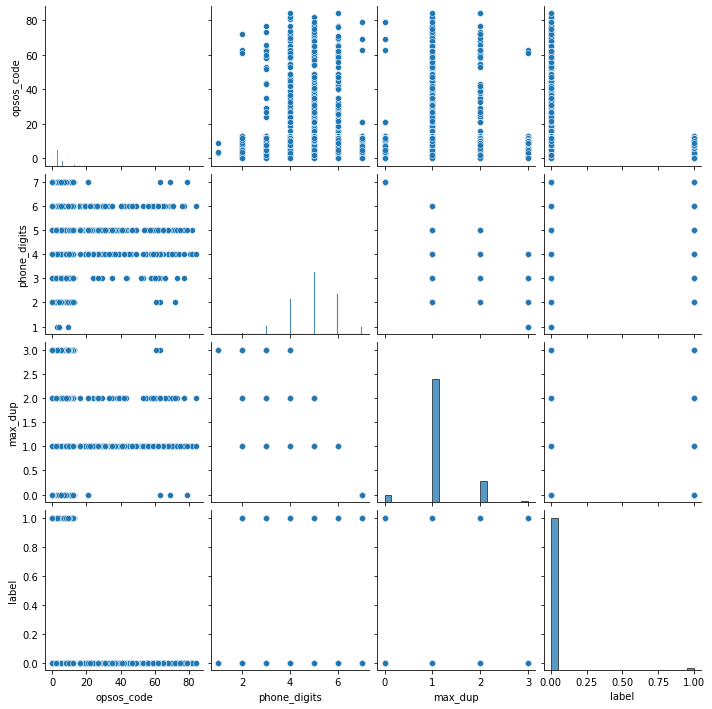

In [58]:
sns.pairplot(df_train[['opsos_code', 'phone_digits', 'max_dup', 'label']])
plt.show()

Deleting all unnecessary columns. Unnecessary implies that some columns contain no non-NaN values and some seem to have no correlation with the label.

In [59]:
DELETE_COLS = ['opsos_code', 'phone_digits', 'max_dup', 'client_id']

df_train.drop(columns=DELETE_COLS, axis=1, inplace=True)
df_train=df_train.dropna(axis=1,how='all')

In [60]:
df_train

,cato_code,gender,country,citizenship,age_days,client_days,monthly_installment,date_close,deposit_sum_KZT,deposit_sum_USD,...,transfers_count_in_10,transfers_amount_out_10,transfers_count_out_10,auth_count_10,salary_10,transactions_amount_8,transactions_count_8,auth_count_8,salary_8,label
0,17.0,1.0,0.0,0.0,11643.0,130.0,0.080061,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,NaN,0.0,0.0,18095.0,994.0,0.033579,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,0.0,0.0,0.0,7955.0,1144.0,NaN,1664582400000000000,NaN,NaN,...,NaN,NaN,NaN,0.033580,NaN,0.037251,0.033580,0.03358,NaN,0
3,NaN,0.0,0.0,0.0,22580.0,847.0,0.047791,-9223372036854775808,NaN,NaN,...,0.033579,0.145198,0.03358,0.033581,0.036560,0.115086,0.033581,0.03358,0.092161,0
4,12.0,0.0,0.0,0.0,13107.0,547.0,0.057000,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941526,6.0,1.0,0.0,0.0,11813.0,462.0,0.046441,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941527,12.0,0.0,0.0,0.0,11573.0,787.0,NaN,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
941528,9.0,1.0,0.0,0.0,11268.0,455.0,0.039833,-9223372036854775808,NaN,NaN,...,NaN,NaN,NaN,0.033580,NaN,NaN,NaN,0.03358,NaN,0
941529,5.0,1.0,0.0,NaN,17215.0,400.0,NaN,-9223372036854775808,NaN,NaN,...,0.033579,0.038325,0.03358,0.033580,0.038471,0.041267,0.033580,0.03358,0.037430,0


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941531 entries, 0 to 941530
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cato_code                736732 non-null  float64
 1   gender                   870421 non-null  float64
 2   country                  857321 non-null  float64
 3   citizenship              645816 non-null  float64
 4   age_days                 936053 non-null  float64
 5   client_days              937166 non-null  float64
 6   monthly_installment      503229 non-null  float64
 7   date_close               941531 non-null  int64  
 8   deposit_sum_KZT          90525 non-null   float64
 9   deposit_sum_USD          90525 non-null   float64
 10  deposit_sum_EUR          90525 non-null   float64
 11  deal_sum_kzt_express     158439 non-null  float64
 12  expired_day_express      158439 non-null  float64
 13  deal_start_date_express  941531 non-null  int64  
 14  plan

# Handling dataset imbalanced-ness

### Handling NaN values using IterativeImputer

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=7, verbose=2, imputation_order='roman',random_state=0)
X_imp = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (941531, 35)
[IterativeImputer] Ending imputation round 1/7, elapsed time 41.76
[IterativeImputer] Change: 25073.551519142005, scaled tolerance: 9223372036854776.0 
[IterativeImputer] Early stopping criterion reached.


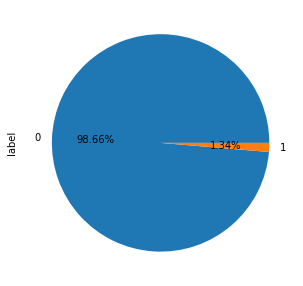

In [63]:
df_train['label'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

The given dataset is highly imbalanced. In order to handle it, we can oversample or undersample the dataset using `SMOTE`, `ADASYN`, and/or `RandomUnderSampler` algorithms.

In [64]:
X = np.array(df_train.drop(columns=['label'], axis=1))
y = np.array(df_train['label'])

In [65]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

## SMOTE

In [66]:
sme = SMOTE(sampling_strategy='minority', n_jobs=-1)

X_smote, y_smote = sme.fit_resample(X_imp, y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)

In [68]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss")

model.fit(X_train, y_train)

Learning rate set to 0.233038
0:	learn: 0.4443900	total: 463ms	remaining: 7m 42s
1:	learn: 0.3380105	total: 786ms	remaining: 6m 32s
2:	learn: 0.2830241	total: 1.12s	remaining: 6m 11s
3:	learn: 0.2502298	total: 1.47s	remaining: 6m 6s
4:	learn: 0.2185436	total: 1.81s	remaining: 6m
5:	learn: 0.2023478	total: 2.19s	remaining: 6m 2s
6:	learn: 0.1904344	total: 2.52s	remaining: 5m 57s
7:	learn: 0.1832717	total: 2.84s	remaining: 5m 51s
8:	learn: 0.1770555	total: 3.13s	remaining: 5m 44s
9:	learn: 0.1708993	total: 3.5s	remaining: 5m 47s
10:	learn: 0.1621075	total: 3.86s	remaining: 5m 46s
11:	learn: 0.1564152	total: 4.14s	remaining: 5m 41s
12:	learn: 0.1528896	total: 4.42s	remaining: 5m 35s
13:	learn: 0.1499241	total: 4.71s	remaining: 5m 31s
14:	learn: 0.1447913	total: 5.05s	remaining: 5m 31s
15:	learn: 0.1414349	total: 5.36s	remaining: 5m 29s
16:	learn: 0.1379569	total: 5.66s	remaining: 5m 27s
17:	learn: 0.1337023	total: 5.96s	remaining: 5m 25s
18:	learn: 0.1312254	total: 6.32s	remaining: 5m 26s

In [69]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    185752
           1       0.99      0.99      0.99    185832

    accuracy                           0.99    371584
   macro avg       0.99      0.99      0.99    371584
weighted avg       0.99      0.99      0.99    371584



## ADASYN

In [70]:
adasyn = ADASYN()

X_ada, y_ada = adasyn.fit_resample(X_imp, y)

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, test_size=0.2)

In [ ]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss")

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

## RandomUnderSampling

In [ ]:
under = RandomUnderSampler(sampling_strategy=0.5)

X_under, y_under = under.fit_resample(X_imp, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2)

In [ ]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss")

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

The above models (and more others not included in this dataset) performed poorly on the Kaggle score.

# Implementing Tree-based models

Since the oversampling and undersampling algorithms resulted in quite low accuracy and f1-score values. This is why we decided to not work with the imbalanced-ness, but use models that handle imbalaced-ness themselves, such as `XGBoost Classifier`, `CatBoostClassifier`, `LGBMClassifier`.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

## CatBoostClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

In [ ]:
from catboost import CatBoostClassifier

# Implementing the CatBoostClassifier model with given parameters
model = CatBoostClassifier(loss_function="Logloss",
                           eval_metric="F1",
                           learning_rate=0.02,
                           l2_leaf_reg=0.1,
                           iterations=5000,
                           random_seed=42,
                           od_type="Iter",
                           depth=8,
                           early_stopping_rounds=20)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

This model gave us the 0.727 f1-score on the Kaggle leaderboard.

## XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
import xgboost

seed = 7
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# Getting the predictions from the model
y_pred_proba = model.predict(X_test)
y_pred = np.array([round(value) for value in y_pred_proba])

In [ ]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

This was the best model with the Kaggle f1-score 0.73.

# Working with the test dataset

In [ ]:
df_test['date_close'] = pd.to_datetime(df_test['date_close']).apply(lambda x: x.value)
df_test['deal_start_date_express'] = pd.to_datetime(df_test['deal_start_date_express']).apply(lambda x: x.value)
df_test['plan_end_date_express'] = pd.to_datetime(df_test['plan_end_date_express']).apply(lambda x: x.value)
df_test['deal_start_date_product'] = pd.to_datetime(df_test['deal_start_date_product']).apply(lambda x: x.value)
df_test['plan_end_date_product'] = pd.to_datetime(df_test['plan_end_date_product']).apply(lambda x: x.value)

In [ ]:
df_test.drop(columns=DELETE_COLS, axis=1, inplace=True)
df_test=df_test.dropna(axis=1,how='all')

In [ ]:
df_test

In [ ]:
y_pred = model.predict(df_test)

In [ ]:
y_pred

## Writing test results into sample_res file

In [ ]:
sample_res= pd.read_csv('../input/gdsc-nu-datathon-jusan-bank-case-competition/sample_res.csv')

In [ ]:
sample_res['target'] = y_pred

In [ ]:
sample_res['target'].value_counts()

In [ ]:
sample_res.to_csv('sample_res.csv', index = False)